In [1]:
# adapted from http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
import numpy as np
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """

    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

# adapted from http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel(data.feature_names[0])
#     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
#     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

def plot_4_classifiers(X, y, clfs):

    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    for clf, ax, title in zip(clfs, sub.flatten(), ("(1)", "(2)", "(3)", "(4)")):
        # clf.fit(X, y)
        plot_classifier(X, y, clf, ax, ticks=True)
        ax.set_title(title)
    plt.show()

In [12]:
#import sklearn.datasets
#wine = sklearn.datasets.load_wine()
#X = wine.data[:,:2]
#y = wine.target

y = np.array([ True,  True, False,  True,  True,  True, False, False,  True,
              False,  True,  True, False, False,  True, False,  True,  True,
              True, False,  True,  True,  True, False,  True,  True,  True,
              True,  True,  True,  True,  True, False,  True,  True,  True,
              False, False,  True,  True,  True,  True, False, False, False,
              True,  True,  True, False,  True])

X = np.array([[11.45,  2.4 ],
              [13.62,  4.95],
              [13.88,  1.89],
              [12.42,  2.55],
              [12.81,  2.31],
              [12.58,  1.29],
              [13.83,  1.57],
              [13.07,  1.5 ],
              [12.7 ,  3.55],
              [13.77,  1.9 ],
              [12.84,  2.96],
              [12.37,  1.63],
              [13.51,  1.8 ],
              [13.87,  1.9 ],
              [12.08,  1.39],
              [13.58,  1.66],
              [13.08,  3.9 ],
              [11.79,  2.13],
              [12.45,  3.03],
              [13.68,  1.83],
              [13.52,  3.17],
              [13.5 ,  3.12],
              [12.87,  4.61],
              [14.02,  1.68],
              [12.29,  3.17],
              [12.08,  1.13],
              [12.7 ,  3.87],
              [11.03,  1.51],
              [13.32,  3.24],
              [14.13,  4.1 ],
              [13.49,  1.66],
              [11.84,  2.89],
              [13.05,  2.05],
              [12.72,  1.81],
              [12.82,  3.37],
              [13.4 ,  4.6 ],
              [14.22,  3.99],
              [13.72,  1.43],
              [12.93,  2.81],
              [11.64,  2.06],
              [12.29,  1.61],
              [11.65,  1.67],
              [13.28,  1.64],
              [12.93,  3.8 ],
              [13.86,  1.35],
              [11.82,  1.72],
              [12.37,  1.17],
              [12.42,  1.61],
              [13.9 ,  1.68],
              [14.16,  2.51]])

C:\Users\hazrulnizam.sidek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


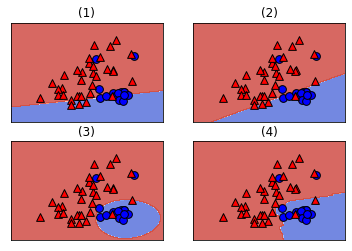

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Define the classifiers
classifiers = [LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, 
                                  intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                                  penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                                  verbose=0, warm_start=False), 
               LinearSVC(), 
               SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
                   max_iter=-1, probability=False, random_state=None, shrinking=True,
                   tol=0.001, verbose=False), 
               KNeighborsClassifier()]

# Fit the classifiers
for c in classifiers:
    c.fit(X, y)

# Plot the classifiers
plot_4_classifiers(X, y, classifiers)
plt.show()

In [15]:
for clf in classifiers:
    print(clf.score(X,y))

0.74
0.88
0.92
0.92
